## 201701633 전민영  실습2

In [4]:
import pandas as pd
from urllib.request import urlopen
from bs4 import BeautifulSoup
date_list = pd.date_range('2020-07-01',periods=100,freq='D')

movie_title = []
movie_point = []
movie_date = []
for today in date_list:
    url = "https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=pnt&date=" + today.strftime('%Y%m%d')
    html = urlopen(url)
    
    soup = BeautifulSoup(html.read(), "html.parser")
    
    titles = soup.find_all('div',{'class':'tit5'}) # 50
    points = soup.find_all('td',{'class':'point'}) # 50
    
    titles_text = []
    points_text = []
    date = []
    for t, p in zip(titles, points):
        titles_text.append(t.text.strip(' \n'))
        points_text.append(float(p.text))
        date.append(today)
        
    movie_title += titles_text
    movie_point += points_text
    movie_date += date

In [5]:
frame = pd.DataFrame({'date': movie_date, 'title': movie_title, 'point': movie_point})
frame

,date,title,point
0,2020-07-01,그린 북,9.59
1,2020-07-01,가버나움,9.59
2,2020-07-01,베일리 어게인,9.53
3,2020-07-01,원더,9.49
4,2020-07-01,포드 V 페라리,9.49
...,...,...,...
4995,2020-10-08,쉰들러 리스트,9.36
4996,2020-10-08,클레멘타인,9.36
4997,2020-10-08,안녕 베일리,9.36
4998,2020-10-08,서유기 2 - 선리기연,9.36


In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


클레멘타인


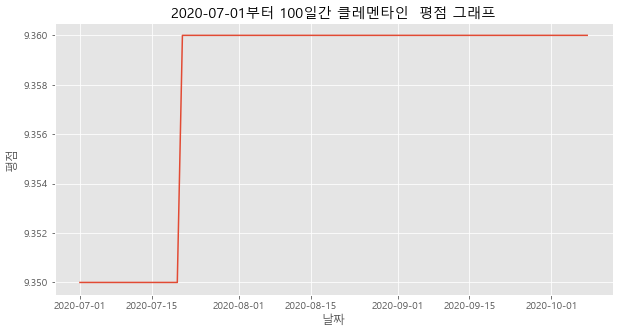

In [15]:
import matplotlib.pyplot as plt
input_title = input()
search_movie = frame.query("title == ['{}']".format(input_title))
plt.rc('font', family = "Malgun Gothic")
plt.rcParams['axes.unicode_minus']=False
plt.style.use("ggplot")

plt.figure(figsize=(10,5))
plt.title('2020-07-01부터 100일간 {}  평점 그래프'.format(input_title))
plt.plot(search_movie['date'], search_movie['point'])
plt.xlabel('날짜')
plt.ylabel('평점')
plt.show()

## 영화 클레멘타인은 7월 15일 이후에 개봉한 것으로 보이고, 7월 15일 이후부터 80일 조금 넘은 기간동안 평균 평점 약 9.3점을 유지했다.